# Analisar acórdãos e pareceres prévios
Versão 1

# Introdução
* Importa acórdãos
* Busca acórdãos cujo texto não foi recuperado
* Extrai dados da decisão dos acórdãos
* Importa pareceres
* Busca pareceres cujo texto não foi recuperado
* Extrai dados da decisão dos pareceres
* Exporta dados para o arquivo tce_decisoes.csv

Também é feita a extração de texto de algumas decisões que estão sem

### Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np

from pathlib import Path
import re

import matplotlib.pyplot as plt
%matplotlib inline

## Importar acórdãos

In [2]:
caminho_db = Path("../../data/raw/tce_acordaos.csv")
df = pd.read_csv(caminho_db, sep=';', encoding='utf-8')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17268 entries, 0 to 17267
Data columns (total 15 columns):
cod_tce          17268 non-null object
assunto          15524 non-null object
tipo_processo    17268 non-null object
cod_ato          17268 non-null int64
ato              17268 non-null object
tipo_ato         17268 non-null object
peca             17268 non-null int64
caminho          17268 non-null object
conselheiro      14075 non-null object
municipio        14144 non-null object
ug               14144 non-null object
procurador       14003 non-null object
ano_exercicio    14111 non-null float64
texto            16925 non-null object
linhas           17184 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 2.0+ MB


In [4]:
df.head()

,cod_tce,assunto,tipo_processo,cod_ato,ato,tipo_ato,peca,caminho,conselheiro,municipio,ug,procurador,ano_exercicio,texto,linhas
0,000038/2014,REPRESENTAÇÃO REF. À IRREGULARIDADES NA CONTRA...,CONTROLE SOCIAL - REPRESENTAÇÃO,350333,ACOCAM - GABELARDO - 166/2014,ACÓRDÃO DE CÂMARA,19,/2014/11/623484/9/2/795temp/ACOCAM.pdf,ABELARDO PIO VILANOVA E SILVA,Colônia do Gurguéia,P. M. DE COLONIA DO GURGUEIA,LEANDRO MACIEL DO NASCIMENTO,2013.0,ACÓRDÃO 1397/14\nPROCESSO TC nº 00003814\nASSU...,"[{'page': 1, 'x0': 257, 'x1': 369, 'bottom': 1..."
1,000040/2014,REPRESENTAÇÃO REF. À IRREGULARIDADES NA ADMINI...,CONTROLE SOCIAL - REPRESENTAÇÃO,302399,ACOCAM - GABELARDO - 122/2014,ACÓRDÃO DE CÂMARA,21,/2014/09/623486/9/2/965temp/ACOCAM.pdf,ABELARDO PIO VILANOVA E SILVA,Colônia do Gurguéia,P. M. DE COLONIA DO GURGUEIA,LEANDRO MACIEL DO NASCIMENTO,2013.0,ACÓRDÃO 940/14\nPROCESSO TC nº 000040/14\nASSU...,"[{'page': 1, 'x0': 260, 'x1': 366, 'bottom': 1..."
2,000004/2020,APOSENTADORIA,INATIVAÇÃO - APOSENTADORIA,2460076,ACOCAM - AUD-JAYLSO - 1577/2020,ACÓRDÃO DE CÂMARA,9,/2020/03//770552/16/2/29032020_102735_57C73E39...,JAYLSON FABIANH LOPES CAMPELO,Itainópolis,FMPS-FUNDO MUNIC. DE PREVIDÊNCIA SOCIAL DE ITA...,MARCIO ANDRE MADEIRA DE VASCONCELOS,2020.0,ACÓRDÃO Nº 356/2020\nPROCESSO TC/000004/2020\n...,"[{'page': 1, 'x0': 230, 'x1': 356, 'bottom': 1..."
3,000115/2017,"DENÚNCIA REF. IRREGULARIDADES NA SESAPI, EXERC...",CONTROLE SOCIAL - DENÚNCIA,1353881,ACOPLE - G.KDE - 188/2017,ACÓRDÃO DO PLENO,34,/2017/08/688319/173/3/478temp/ACOPLE.pdf,NaN,NaN,NaN,NaN,NaN,ACÓRDÃO Nº 2.283/2017 (fl. 01)\n\n\nPROCESSO: ...,"[{'page': 1, 'x0': 229, 'x1': 397, 'bottom': 1..."
4,000135/2020,RECURSO DE RECONSIDERAÇÃO REF. AO TC/005130/2015,DOS RECURSOS - RECURSO DE RECONSIDERAÇÃO,2462530,ACOCAM - G.WA - 690/2020,ACÓRDÃO DE CÂMARA,15,/2020/03//770683/8/2/17032020_095623_46033325D...,WALTANIA MARIA NOGUEIRA DE SOUSA LEAL ALVARENGA,Nazária,CAMARA DE NAZARIA,JOSE ARAUJO PINHEIRO JUNIOR,2015.0,ACÓRDÃO Nº 317/2020\nPROCESSO: TC/000135/2020\...,"[{'page': 1, 'x0': 245, 'x1': 377, 'bottom': 1..."


### Plotar coordenadas de determinado acórdão

In [5]:
linhas = eval(df.iloc[10]['linhas'])
linhas

[{'page': 1,
  'x0': 250,
  'x1': 376,
  'bottom': 136,
  'text': 'ACÓRDÃO Nº 1.242/18 '},
 {'page': 1, 'x0': 85, 'x1': 88, 'bottom': 157, 'text': ' '},
 {'page': 1,
  'x0': 85,
  'x1': 239,
  'bottom': 177,
  'text': 'PROCESSO TC/000043/2016 '},
 {'page': 1,
  'x0': 85,
  'x1': 209,
  'bottom': 198,
  'text': 'DECISÃO Nº 241/2018. '},
 {'page': 1,
  'x0': 85,
  'x1': 541,
  'bottom': 218,
  'text': 'ASSUNTO: Denúncia contra a Prefeitura Municipal de Dom Expedito Lopes-PI (exercício '},
 {'page': 1,
  'x0': 85,
  'x1': 541,
  'bottom': 239,
  'text': 'financeiro de 2014), por supostas irregularidades no atraso do repasse do duodécimo para a '},
 {'page': 1,
  'x0': 85,
  'x1': 317,
  'bottom': 260,
  'text': 'Câmara Municipal de Dom Expedito Lopes/PI.  '},
 {'page': 1,
  'x0': 85,
  'x1': 392,
  'bottom': 281,
  'text': 'DENUNCIADO: Alecxo de Moura Belo – Prefeito Municipal. '},
 {'page': 1,
  'x0': 85,
  'x1': 541,
  'bottom': 301,
  'text': 'DENUNCIANTES(S): Josenilza Pereira de Mour

In [6]:
x = [linha['x0'] for linha in linhas if linha['page']==1]
y = [linha['bottom'] for linha in linhas if linha['page']==1]

In [7]:
pd.DataFrame({'x': x, 'y': y})

,x,y
0,250,136
1,85,157
2,85,177
3,85,198
4,85,218
5,85,239
6,85,260
7,85,281
8,85,301
9,85,322


C:\Users\antonio.moreira\AppData\Local\Continuum\anaconda3\envs\ocr\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\antonio.moreira\AppData\Local\Continuum\anaconda3\envs\ocr\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\antonio.moreira\AppData\Local\Continuum\anaconda3\envs\ocr\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().ro

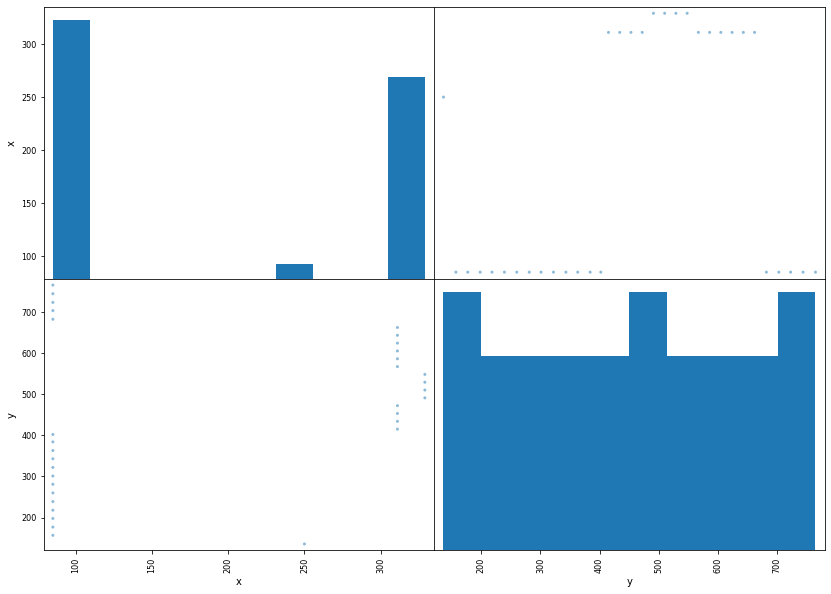

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(pd.DataFrame({'x': x, 'y': y}),figsize=(14,10), alpha=0.5, );

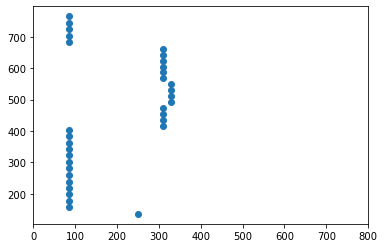

In [9]:
# Analisar ax.broken_barh (https://matplotlib.org/gallery/lines_bars_and_markers/broken_barh.html#sphx-glr-gallery-lines-bars-and-markers-broken-barh-py)
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlim(0, 800)

plt.show()

In [10]:
df.iloc[3135]

cod_tce                                                005380/2015
assunto                          PROTOCOLO GERADO AUTOMATICAMENTE.
tipo_processo                     PRESTAÇÃO DE CONTAS - PROVISÓRIO
cod_ato                                                    1628961
ato                                 ACO - AUD-JACKSO  -  1012/2018
tipo_ato                                                   ACÓRDÃO
peca                                                            66
caminho                     /2018/03/649650/119/75/587temp/ACO.pdf
conselheiro        WALTANIA MARIA NOGUEIRA DE SOUSA LEAL ALVARENGA
municipio                                    Santo Inácio do Piauí
ug                                  P. M. DE SANTO INACIO DO PIAUI
procurador                               PLÍNIO VALENTE RAMOS NETO
ano_exercicio                                                 2015
texto            ACÓRDÃO Nº 420/2018\n\nPROCESSO TC/005380/2015...
linhas           [{'page': 1, 'x0': 258, 'x1': 360, 'bottom': 

In [11]:
df[['texto', 'linhas']]

,texto,linhas
0,ACÓRDÃO 1397/14\nPROCESSO TC nº 00003814\nASSU...,"[{'page': 1, 'x0': 257, 'x1': 369, 'bottom': 1..."
1,ACÓRDÃO 940/14\nPROCESSO TC nº 000040/14\nASSU...,"[{'page': 1, 'x0': 260, 'x1': 366, 'bottom': 1..."
2,ACÓRDÃO Nº 356/2020\nPROCESSO TC/000004/2020\n...,"[{'page': 1, 'x0': 230, 'x1': 356, 'bottom': 1..."
3,ACÓRDÃO Nº 2.283/2017 (fl. 01)\n\n\nPROCESSO: ...,"[{'page': 1, 'x0': 229, 'x1': 397, 'bottom': 1..."
4,ACÓRDÃO Nº 317/2020\nPROCESSO: TC/000135/2020\...,"[{'page': 1, 'x0': 245, 'x1': 377, 'bottom': 1..."
...,...,...
17263,ACÓRDÃO Nº 1.858/2013\n\n\nProcesso TC-O nº 04...,"[{'page': 1, 'x0': 250, 'x1': 386, 'bottom': 1..."
17264,ACÓRDÃO Nº 395/2019\n\nPROCESSO: TC-O-044013/...,"[{'page': 1, 'x0': 242, 'x1': 377, 'bottom': 1..."
17265,ACORDÃO N°. 368/15\n\nPROCESSO TC-O- 049940/20...,"[{'page': 1, 'x0': 240, 'x1': 387, 'bottom': 1..."
17266,ACÓRDÃO Nº 1.712/2016\n\nACÓRDÃO Nº 1.712/2016...,"[{'page': 1, 'x0': 247, 'x1': 380, 'bottom': 1..."


In [12]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../src'))
sys.path.insert(0, os.path.abspath('../../src/preparation'))

from acordaos_utils import clean_text
from processa_acordao import extrai_tipo_numero_ano
from processa_pdf import extrai_acordao

\\alya\ftpf$\etce\2013\11\533724\120\42\644temp\PARPRE_assinado_assinado_assinado.pdf
PARECER PRÉVIO Nº 192-B/13

PROCESSO TC-E 14.263/12
ASSUNTO: Prestação de Contas de Governo do Município de Santa Cruz do Piauí, Exercício
2011
RESPONSÁVEL: Jandira Nunes Martins
RELATOR: Delano Carneiro da Cunha Câmara
PROCURADOR (A): Márcio André Madeira de Vasconcelos
ADVOGADO (A): Armando Ferraz Nunes – OAB/PI nº 14/77 (Procuração: fl. 02  - Peça 36)



PRESTAÇÃO DAS CONTAS DE GOVERNO DO
MUNICÍPIO DE SANTA CRUZ DO PIAUÍ.
Exercício 2011. Sob a responsabilidade da Sra.
Jandira Nunes Martins. Parecer prévio
recomendando a reprovação. Decisão unânime.


Vistos, relatados e discutidos os presentes autos, considerando as informações da
V Divisão Técnica da Diretoria de Fiscalização da Administração Municipal – DFAM, às fls.
76/114 (Peça 08), o contraditório da II Divisão Técnica da Diretoria de Fiscalização da
Administração Municipal – DFAM, às fls. 01/26 (Peça 27), a manifestação do Ministério
Público 

## Analisar acódãos cujo texto não foi recuperado
Percebi ALGUNS acórdãos com identificação diferente da determinada e, por isso, o texto não foi estraído. Alguns exemplos:
* PARECER PRÉVIO
* DECISÃO MONOCRÁTICA

In [13]:
# Filtrar somente os que não possuem texto
#df_sem_texto = df[(df['texto'].isna()) & (df['ano_exercicio'] > 2013)]
df_sem_texto = df[df['texto'].isna()]
df_sem_texto

,cod_tce,assunto,tipo_processo,cod_ato,ato,tipo_ato,peca,caminho,conselheiro,municipio,ug,procurador,ano_exercicio,texto,linhas
16,004625/2013,NaN,BALANÇO GERAL,7729,ACOCAM - GREBELO - 1/2013,ACÓRDÃO DE CÂMARA,1,/2013/04/607197/13/2/537temp/ACOCAM.pdf,ANFRISIO NETO LOBAO CASTELO BRANCO,Teresina,LACEN - LABORATORIO CENTRAL DR. COSTA ALVARENG...,JOSÉ ARAÚJO PINHEIRO JÚNIOR,2013.0,NaN,[]
93,000557/2019,RECURSO DE RECONSIDERAÇÃO REF. AO TC/003053/20...,DOS RECURSOS - RECURSO DE RECONSIDERAÇÃO,2002893,ACO - AUD-JACKSO - 1236/2019,ACÓRDÃO,12,/2019/02/749088/119/75/856temp/ACO.pdf,NaN,NaN,NaN,NaN,NaN,NaN,[]
124,000900/2017,APOSENTADORIA,INATIVAÇÃO - APOSENTADORIA,1245846,ACO - AUD-JACKSO - 698/2017,ACÓRDÃO,5,/2017/05/689104/119/75/909temp/ACO.pdf,JACKSON NOBRE VERAS,Uniao,FMPS-FUNDO MUNIC. DE PREVIDÊNCIA SOCIAL DE UNIAO,LEANDRO MACIEL DO NASCIMENTO,2017.0,NaN,[]
517,002885/2016,PROTOCOLO GERADO AUTOMATICAMENTE.,PRESTAÇÃO DE CONTAS - PROVISÓRIO,1645522,ACOCAM - G.WA - 500/2018,ACÓRDÃO DE CÂMARA,59,/2018/04/668940/8/2/830temp/ACOCAM.pdf,WALTANIA MARIA NOGUEIRA DE SOUSA LEAL ALVARENGA,Alto Longá,P. M. DE ALTO LONGA,JOSE ARAUJO PINHEIRO JUNIOR,2016.0,NaN,[]
528,002885/2016,PROTOCOLO GERADO AUTOMATICAMENTE.,PRESTAÇÃO DE CONTAS - PROVISÓRIO,1645524,ACOCAM - G.WA - 500/2018,ACÓRDÃO DE CÂMARA,60,/2018/04/668940/8/2/830temp/ACOCAM.pdf,WALTANIA MARIA NOGUEIRA DE SOUSA LEAL ALVARENGA,Alto Longá,P. M. DE ALTO LONGA,JOSE ARAUJO PINHEIRO JUNIOR,2016.0,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17214,17283/2012,NaN,CONTAS - CONTAS DE GESTÃO,266166,ACOCAM - GKBARROS - 66/2014,ACÓRDÃO DE CÂMARA,33,/2014/07/536745/11/2/119temp/ACOCAM.pdf,JOAQUIM KENNEDY NOGUEIRA BARROS,Padre Marcos,P. M. DE PADRE MARCOS,MÁRCIO ANDRÉ MADEIRA DE VASCONCELOS,2011.0,NaN,[]
17218,18275/2011,NaN,CONTAS - CONTAS DE GESTÃO,415916,ACOCAM - AUD-JACKSO - 25/2015,ACÓRDÃO DE CÂMARA,46,/2015/02/485743/119/2/768temp/ACOCAM.pdf,JACKSON NOBRE VERAS,São Pedro do Piauí,P. M. DE SAO PEDRO DO PIAUI,JOSÉ ARAÚJO PINHEIRO JÚNIOR,2010.0,NaN,[]
17233,20660/2012,NaN,CONTAS - CONTAS DE GESTÃO,776435,ACOCAM - AUD4 - 404/2016,ACÓRDÃO DE CÂMARA,52,/2016/03/540122/121/2/855temp/ACOCAM.pdf,ALISSON FELIPE DE ARAUJO,Riacho Frio,P. M. DE RIACHO FRIO,MÁRCIO ANDRÉ MADEIRA DE VASCONCELOS,2011.0,NaN,[]
17236,21236/2012,NaN,CONTAS - CONTAS DE GESTÃO,239447,ACOCAM - G.LNM - 51/2014,ACÓRDÃO DE CÂMARA,44,/2014/05/540698/133/2/994temp/ACOCAM.pdf,LILIAN DE ALMEIDA VELOSO NUNES MARTINS,Juazeiro do Piauí,P. M. DE JUAZEIRO DO PIAUI,RAÏSSA MARIA REZENDE DE DEUS BARBOSA,2011.0,NaN,[]


In [14]:
texto, _ = extrai_acordao(df_sem_texto["caminho"][517])
texto

\\alya\ftpd$\etce\2018\04\668940\8\2\830temp\ACOCAM.pdf


'PARECER PRÉVIO Nº 43/2018\n\nPARECER PRÉVIO Nº 43/2018\n\nPROCESSO:  TC/002885/2016\nASSUNTO:  PRESTAÇÃO DE CONTAS DE GOVERNO - EXERCÍCIO DE\n2016\nINTERESSADO:  MUNICÍPIO DE ALTO LONGÁ\nGESTOR: FLÁVIO CAMPOS SOARES (01/01 – 31/12/2016)\nRELATORA:  CONS.ª WALTÂNIA MARIA N. DE SOUSA LEAL ALVARENGA\nPROCURADOR:  JOSÉ ARAÚJO PINHEIRO JUNIOR\nADVOGADO: VÁLBER DE ASSUNÇÃO MELO– OAB/PI Nº 1.934 E OUTROS\n\n\nEMENTA: CONTAS DE GOVERNO. AGENTE POLÍTICO.\nABERTURA DE CRÉDITOS ADICIONAIS ACIMA DO\nLIMITE LEGAL. INSUFICIÊNCIA NA ARRECADAÇÃO\nTRIBUTÁRIA. DESPESA COM PESSOAL ACIMA DO\nLIMITE LEGAL. DENTRE OUTRAS FALHAS.\n1. A abertura de créditos adicionais suplementares durante o\nexercício financeiro, ainda que tenha como fonte o excesso\nde arrecadação, deve limitar-se ao percentual estabelecido\nna Lei de Diretrizes Orçamentárias.\n\n2. A ausência de arrecadação dos tributos de competência\nconstitucional do ente da Federação caracteriza\nirresponsabilidade na gestão fiscal, em razão da vedaçã

In [15]:
df_sem_texto.loc[517, ['cod_tce', 'ato']]

cod_tce                   002885/2016
ato        ACOCAM - G.WA  -  500/2018
Name: 517, dtype: object

In [32]:
# Tentar recuperar acórdão de registos faltantes
def reextrai_acordao(df_sem_texto, df):
    for ind in df_sem_texto.index:
        #print(df_sem_texto.loc[ind].caminho)
        try:
            texto, linhas = extrai_acordao(df_sem_texto.loc[ind].caminho)
            print(f'Extraindo texto {ind} de {len(df)-1}')
            df.loc[ind, ['texto', 'linhas']] = texto, linhas
        except FileExistsError as erro:
            print(erro)

In [ ]:
#reextrai_acordao(df_sem_texto, df)

In [17]:
# Filtrar os que ainda não possuem texto
df_sem_texto = df[df['texto'].isna()]
df_sem_texto

,cod_tce,assunto,tipo_processo,cod_ato,ato,tipo_ato,peca,caminho,conselheiro,municipio,ug,procurador,ano_exercicio,texto,linhas
8849,019350/2013,Parcelamento de multa,MULTA,109849,ACO - CTRLMULTA - 18/2013,ACÓRDÃO,6,/2013/12/622668/58/75/ACORDAO-2008_Francineide...,WALTANIA MARIA NOGUEIRA DE SOUSA LEAL ALVARENGA,Canto do Buriti,HOSP. EST. DOMINGOS CHAVES / CANTO DO BURITI,NaN,2013.0,None,None
12590,005988/2017,PROTOCOLO GERADO AUTOMATICAMENTE.,PRESTAÇÃO DE CONTAS - PROVISÓRIO,2587000,ACOCAM - GREBELO - 791/2020,ACÓRDÃO DE CÂMARA,47,/2020/08//694192/13/2/19082020_152519_4F33AF3A...,OLAVO REBELO DE CARVALHO FILHO,Bonfim do Piauí,P. M. DE BONFIM DO PIAUI,RAÏSSA MARIA REZENDE DE DEUS BARBOSA,2017.0,None,None
15154,14556/2012,PRESTAÇÃO DE CONTAS - 2011,CONTAS - CONTAS DE GESTÃO,140456,ACOPLE - GKBARROS - 29/2014,ACÓRDÃO DO PLENO,54,/2014/02/534017/11/3/558temp/ACOPLE_assinado_a...,JOAQUIM KENNEDY NOGUEIRA BARROS,Francisco Santos,P. M. DE FRANCISCO SANTOS,PLÍNIO VALENTE RAMOS NETO,2012.0,NaN,NaN


## Extrair número e ano do acórdão

In [18]:
clean_text(df.iloc[1]['texto'])

'acordao 940/14\nprocesso tc n 000040/14\nassunto: representacao contra a prefeitura municipal de colonia do gurgueia, exercicio financeiro de 2013.\ninteressado: jose carlos goncalves teodoro, presidente da camara municipal de colonia do gurgueia.\nrepresentado: lisiane franco rocha araujo, prefeita municipal de colonia do gurgueia.\nobjeto: supostas irregularidades no ambito da prefeitura municipal do referido municipio, mais\nespecificamente quanto a contratacao do sr. raimundo nonato almeida como representante da secretaria\nmunicipal de agricultura no conselho municipal de assistencia social.\nadvogada: hillana martina lopes mousinho neiva - oab/pi n 6.544 (proc. peca 15).\nrelator substituto: conselheiro substituto alisson felipe de araujo\n\nrepresentacao contra a prefeitura municipal de\ncolonia do gurgueia, exercicio de 2013.\nimprocedencia e arquivamento. decisao unanime.\n\nvistos, relatados e discutidos os presentes autos, considerando o parecer do ministerio publico de\nco

In [19]:
df[df['cod_tce']=='003054/2016']
extrai_tipo_numero_ano(df.iloc[0]['texto'])

('acordao', '1397', 2014)

In [20]:
def seta_tipo_numero_ano(df):
    for ind in df.index: 
        tipo, numero, ano = extrai_tipo_numero_ano(df.loc[ind]['texto'])
        df.loc[ind, 'decisao_tipo'] = tipo
        df.loc[ind, 'decisao_numero'] = numero
        df.loc[ind, 'decisao_ano'] = ano

In [21]:
# Setar dados da decisão nos acórdãos
seta_tipo_numero_ano(df)
df

,cod_tce,assunto,tipo_processo,cod_ato,ato,tipo_ato,peca,caminho,conselheiro,municipio,ug,procurador,ano_exercicio,texto,linhas,decisao_tipo,decisao_numero,decisao_ano
0,000038/2014,REPRESENTAÇÃO REF. À IRREGULARIDADES NA CONTRA...,CONTROLE SOCIAL - REPRESENTAÇÃO,350333,ACOCAM - GABELARDO - 166/2014,ACÓRDÃO DE CÂMARA,19,/2014/11/623484/9/2/795temp/ACOCAM.pdf,ABELARDO PIO VILANOVA E SILVA,Colônia do Gurguéia,P. M. DE COLONIA DO GURGUEIA,LEANDRO MACIEL DO NASCIMENTO,2013.0,ACÓRDÃO 1397/14\nPROCESSO TC nº 00003814\nASSU...,"[{'page': 1, 'x0': 257, 'x1': 369, 'bottom': 1...",acordao,1397,2014.0
1,000040/2014,REPRESENTAÇÃO REF. À IRREGULARIDADES NA ADMINI...,CONTROLE SOCIAL - REPRESENTAÇÃO,302399,ACOCAM - GABELARDO - 122/2014,ACÓRDÃO DE CÂMARA,21,/2014/09/623486/9/2/965temp/ACOCAM.pdf,ABELARDO PIO VILANOVA E SILVA,Colônia do Gurguéia,P. M. DE COLONIA DO GURGUEIA,LEANDRO MACIEL DO NASCIMENTO,2013.0,ACÓRDÃO 940/14\nPROCESSO TC nº 000040/14\nASSU...,"[{'page': 1, 'x0': 260, 'x1': 366, 'bottom': 1...",acordao,940,2014.0
2,000004/2020,APOSENTADORIA,INATIVAÇÃO - APOSENTADORIA,2460076,ACOCAM - AUD-JAYLSO - 1577/2020,ACÓRDÃO DE CÂMARA,9,/2020/03//770552/16/2/29032020_102735_57C73E39...,JAYLSON FABIANH LOPES CAMPELO,Itainópolis,FMPS-FUNDO MUNIC. DE PREVIDÊNCIA SOCIAL DE ITA...,MARCIO ANDRE MADEIRA DE VASCONCELOS,2020.0,ACÓRDÃO Nº 356/2020\nPROCESSO TC/000004/2020\n...,"[{'page': 1, 'x0': 230, 'x1': 356, 'bottom': 1...",acordao,356,2020.0
3,000115/2017,"DENÚNCIA REF. IRREGULARIDADES NA SESAPI, EXERC...",CONTROLE SOCIAL - DENÚNCIA,1353881,ACOPLE - G.KDE - 188/2017,ACÓRDÃO DO PLENO,34,/2017/08/688319/173/3/478temp/ACOPLE.pdf,NaN,NaN,NaN,NaN,NaN,ACÓRDÃO Nº 2.283/2017 (fl. 01)\n\n\nPROCESSO: ...,"[{'page': 1, 'x0': 229, 'x1': 397, 'bottom': 1...",acordao,2283,2017.0
4,000135/2020,RECURSO DE RECONSIDERAÇÃO REF. AO TC/005130/2015,DOS RECURSOS - RECURSO DE RECONSIDERAÇÃO,2462530,ACOCAM - G.WA - 690/2020,ACÓRDÃO DE CÂMARA,15,/2020/03//770683/8/2/17032020_095623_46033325D...,WALTANIA MARIA NOGUEIRA DE SOUSA LEAL ALVARENGA,Nazária,CAMARA DE NAZARIA,JOSE ARAUJO PINHEIRO JUNIOR,2015.0,ACÓRDÃO Nº 317/2020\nPROCESSO: TC/000135/2020\...,"[{'page': 1, 'x0': 245, 'x1': 377, 'bottom': 1...",acordao,317,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17263,43875/2012,NaN,CONTAS - CONTAS DE GESTÃO,67332,ACOCAM - GANFRISIO - 17/2013,ACÓRDÃO DE CÂMARA,16,/2013/10/563340/10/2/269temp/ACOCAM.pdf,ANFRISIO NETO LOBAO CASTELO BRANCO,Teresina,COORD. REG. SAUDE IV - TERESINA,MÁRCIO ANDRÉ MADEIRA DE VASCONCELOS,2011.0,ACÓRDÃO Nº 1.858/2013\n\n\nProcesso TC-O nº 04...,"[{'page': 1, 'x0': 250, 'x1': 386, 'bottom': 1...",acordao,1858,2013.0
17264,44013/2010,Edital nº 01/2009 - Atos de Admissão de Pessoal,ADMISSÃO,2057543,ACOCAM - G.WA - 592/2019,ACÓRDÃO DE CÂMARA,21,/2019/03/458639/8/2/912temp/ACOCAM.pdf,WALTANIA MARIA NOGUEIRA DE SOUSA LEAL ALVARENGA,Francisco Ayres,P. M. DE FRANCISCO AYRES,LEANDRO MACIEL DO NASCIMENTO,2010.0,ACÓRDÃO Nº 395/2019\n\nPROCESSO: TC-O-044013/...,"[{'page': 1, 'x0': 242, 'x1': 377, 'bottom': 1...",acordao,395,2019.0
17265,49940/2011,NaN,ADMISSÃO,447176,ACOCAM - G.LNM - 193/2015,ACÓRDÃO DE CÂMARA,16,/2015/03/517407/133/2/758temp/ACOCAM.pdf,LILIAN DE ALMEIDA VELOSO NUNES MARTINS,Itainópolis,P. M. DE ITAINOPOLIS,JOSÉ ARAÚJO PINHEIRO JÚNIOR,2011.0,ACORDÃO N°. 368/15\n\nPROCESSO TC-O- 049940/20...,"[{'page': 1, 'x0': 240, 'x1': 387, 'bottom': 1...",acordao,368,2015.0
17266,49994/2011,NaN,ADMISSÃO,888694,ACOPLE - G.WA - 41/2016,ACÓRDÃO DO PLENO,24,/2016/06/517461/8/3/620temp/ACOPLE.pdf,JAYLSON FABIANH LOPES CAMPELO,Bocaina,P. M. DE BOCAINA,PLÍNIO VALENTE RAMOS NETO,2011.0,ACÓRDÃO Nº 1.712/2016\n\nACÓRDÃO Nº 1.712/2016...,"[{'page': 1, 'x0': 247, 'x1': 380, 'bottom': 1...",acordao,1712,2016.0


In [37]:
# quantidade de acórdãos por ano da decisão
df['decisao_ano'].value_counts()

2016.0     3575
2017.0     3191
2015.0     3056
2019.0     2402
2018.0     2202
2014.0     1493
2020.0     1017
2013.0      261
2011.0       10
2010.0        5
2012.0        4
166.0         1
20015.0       1
2009.0        1
Name: decisao_ano, dtype: int64

In [23]:
# acórdãos que possuem texto mas que número do acórdão não foi extraído
df['decisao_numero'].isna() & df['texto'].notna()

0        False
1        False
2        False
3        False
4        False
         ...  
17263    False
17264    False
17265    False
17266    False
17267    False
Length: 17268, dtype: bool

In [24]:
# Únicos números de acórdão que não consegui resolver
df[df['decisao_numero'].isna() & df['texto'].notna()]['texto']

16                                                        
93                                                        
124                                                       
1971                                                      
2304                                                      
2349                                                      
2354                                                      
3307     ACÓRDÃO Nº (PEÇA 25) PUBLICADO NO DIÁRIO OFICI...
4343                                                      
4396     ACÓRDÃO Nº. 002-2020\nDECISÃO Nº. 006/2020.\nP...
4618                                                      
4890     ACÓRDÃO Nº 1.535-A\n\n\nPROCESSO TC/010164/201...
5032                                                      
5384     ACÓRDÃO Nº 1.1902013\n\nProcesso TC nº 10.361/...
5557                                                      
5625                                                      
6311                                                    

In [25]:
# Comprimentos dos números dos acórdãos
df[df['decisao_numero'].notna()]['decisao_numero'].apply(len).value_counts()

4    9786
3    6643
2     487
6     195
5     108
Name: decisao_numero, dtype: int64

In [26]:
# Quantidade de acórdãos por tipo
df['decisao_tipo'].value_counts()

acordao    16996
parecer      223
Name: decisao_tipo, dtype: int64

## Importar pareceres prévios

In [27]:
caminho_db = Path("../../data/raw/tce_pareceres.csv")
df_pp = pd.read_csv(caminho_db, sep=';', encoding='utf-8')

## Pareceres cujo texto não foi recuperado

In [28]:
# Filtrar somente os que não possuem texto
df_sem_texto = df_pp[df_pp['texto'].isna()]
df_sem_texto

,cod_tce,assunto,tipo_processo,cod_ato,ato,tipo_ato,peca,caminho,conselheiro,municipio,ug,procurador,ano_exercicio,texto,linhas
234,053013/2012,PROTOCOLO GERADO AUTOMATICAMENTE,CONTAS - CONTAS DE GESTÃO,646136,PARPRE - AUD-JAYLSO - 42/2015,PARECER PRÉVIO,53,/2015/10/609846/16/42/707temp/PARPRE.pdf,DELANO CARNEIRO DA CUNHA CAMARA,Curimatá,P. M. DE CURIMATA,LEANDRO MACIEL DO NASCIMENTO,2012.0,NaN,[]
242,005201/2015,PROTOCOLO GERADO AUTOMATICAMENTE.,CONTAS - CONTAS DE GESTÃO,1508418,PARPRE - AUD-JAYLSO - 120/2017,PARECER PRÉVIO,64,/2017/11/649471/16/42/958temp/PARPRE.pdf,JAYLSON FABIANH LOPES CAMPELO,Manoel Emídio,P. M. DE MANOEL EMIDIO,RAÏSSA MARIA REZENDE DE DEUS BARBOSA,2015.0,NaN,[]
533,005403/2015,PROTOCOLO GERADO AUTOMATICAMENTE.,CONTAS - CONTAS DE GESTÃO,1476842,PARPRE - AUD-JAYLSO - 119/2017,PARECER PRÉVIO,52,/2017/11/649673/16/42/448temp/PARPRE.pdf,JAYLSON FABIANH LOPES CAMPELO,Conceição do Canindé,P. M. DE CONCEICAO DO CANINDE,RAÏSSA MARIA REZENDE DE DEUS BARBOSA,2015.0,NaN,[]
788,14263/2012,NaN,CONTAS - CONTAS DE GESTÃO,96108,PARPRE - AUD-DELANO - 5/2013,PARECER PRÉVIO,45,/2013/11/533724/120/42/644temp/PARPRE_assinado...,DELANO CARNEIRO DA CUNHA CAMARA,Santa Cruz do Piauí,P. M. DE SANTA CRUZ DO PIAUI,MÁRCIO ANDRÉ MADEIRA DE VASCONCELOS,2011.0,NaN,NaN
1269,010232/2013,RECURSO DE RECONSIDERAÇÃO REF. AO TC-E 13487/11,DOS RECURSOS - RECURSO DE RECONSIDERAÇÃO,275231,PARPRE - AUD-JACKSO - 1/2014,PARECER PRÉVIO,17,/2014/08/613525/119/42/532temp/PARPRE.pdf,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [29]:
df_pp.loc[788]['texto']

nan

In [ ]:
df_pp.loc[788]['caminho']

In [30]:
texto, linhas = extrai_acordao(df_pp.loc[788].caminho)
texto

\\alya\ftpf$\etce\2013\11\533724\120\42\644temp\PARPRE_assinado_assinado_assinado.pdf


'PARECER PRÉVIO Nº 192-B/13\n\nPROCESSO TC-E 14.263/12\nASSUNTO: Prestação de Contas de Governo do Município de Santa Cruz do Piauí, Exercício\n2011\nRESPONSÁVEL: Jandira Nunes Martins\nRELATOR: Delano Carneiro da Cunha Câmara\nPROCURADOR (A): Márcio André Madeira de Vasconcelos\nADVOGADO (A): Armando Ferraz Nunes – OAB/PI nº 14/77 (Procuração: fl. 02  - Peça 36)\n\n\n\nPRESTAÇÃO DAS CONTAS DE GOVERNO DO\nMUNICÍPIO DE SANTA CRUZ DO PIAUÍ.\nExercício 2011. Sob a responsabilidade da Sra.\nJandira Nunes Martins. Parecer prévio\nrecomendando a reprovação. Decisão unânime.\n\n\nVistos, relatados e discutidos os presentes autos, considerando as informações da\nV Divisão Técnica da Diretoria de Fiscalização da Administração Municipal – DFAM, às fls.\n76/114 (Peça 08), o contraditório da II Divisão Técnica da Diretoria de Fiscalização da\nAdministração Municipal – DFAM, às fls. 01/26 (Peça 27), a manifestação do Ministério\nPúblico de Contas, às fls. 01/23 (Peça 30), a sustentação oral do Advo

In [33]:
# Tentar recuperar acórdão de registos faltantes
reextrai_acordao(df_sem_texto, df_pp)

\\alya\ftpf$\etce\2015\10\609846\16\42\707temp\PARPRE.pdf
Extraindo texto 234 de 1269
\\alya\ftpd$\etce\2017\11\649471\16\42\958temp\PARPRE.pdf
Extraindo texto 242 de 1269
\\alya\ftpd$\etce\2017\11\649673\16\42\448temp\PARPRE.pdf
Extraindo texto 533 de 1269
\\alya\ftpf$\etce\2013\11\533724\120\42\644temp\PARPRE_assinado_assinado_assinado.pdf
Extraindo texto 788 de 1269
\\alya\ftpf$\etce\2014\08\613525\119\42\532temp\PARPRE.pdf
Extraindo texto 1269 de 1269


In [34]:
# Filtrar os que ainda não possuem texto
df_sem_texto = df_pp[df_pp['texto'].isna()]
df_sem_texto

,cod_tce,assunto,tipo_processo,cod_ato,ato,tipo_ato,peca,caminho,conselheiro,municipio,ug,procurador,ano_exercicio,texto,linhas


In [35]:
# Setar dados da decisão nos pareceres
seta_tipo_numero_ano(df_pp)
df_pp

,cod_tce,assunto,tipo_processo,cod_ato,ato,tipo_ato,peca,caminho,conselheiro,municipio,ug,procurador,ano_exercicio,texto,linhas,decisao_tipo,decisao_numero,decisao_ano
0,006633/2013,PROTOCOLO GERADO AUTOMATICAMENTE,CONTAS - CONTAS DE GESTÃO,886301,PARPRE - GREBELO - 77/2016,PARECER PRÉVIO,44,/2016/06/609205/13/42/177temp/PARPRE.pdf,OLAVO REBELO DE CARVALHO FILHO,Olho D Água do Piauí,P. M. DE OLHO D AGUA DO PIAUI,JOSE ARAUJO PINHEIRO JUNIOR,2013.0,PARECER PRÉVIO Nº. 135/2016\n\n\n\nPrestação d...,"[{'page': 1, 'x0': 206, 'x1': 421, 'bottom': 1...",parecer,135,2016.0
1,006638/2013,PROTOCOLO GERADO AUTOMATICAMENTE,CONTAS - CONTAS DE GESTÃO,1424561,PARPRE - AUD-JACKSO - 99/2017,PARECER PRÉVIO,80,/2017/09/609210/119/42/399temp/PARPRE.pdf,JACKSON NOBRE VERAS,Palmeirais,P. M. DE PALMEIRAIS,LEANDRO MACIEL DO NASCIMENTO,2013.0,PARECER PRÉVIO Nº 150/2017\n\nPROCESSO TC/0282...,"[{'page': 1, 'x0': 241, 'x1': 376, 'bottom': 1...",parecer,150,2017.0
2,006638/2013,PROTOCOLO GERADO AUTOMATICAMENTE,CONTAS - CONTAS DE GESTÃO,1424563,PARPRE - AUD-JACKSO - 100/2017,PARECER PRÉVIO,81,/2017/09/609210/119/42/37temp/PARPRE.pdf,JACKSON NOBRE VERAS,Palmeirais,P. M. DE PALMEIRAIS,LEANDRO MACIEL DO NASCIMENTO,2013.0,PARECER PRÉVIO Nº 151/2017\n\nPROCESSO TC/0282...,"[{'page': 1, 'x0': 241, 'x1': 376, 'bottom': 1...",parecer,151,2017.0
3,006653/2013,PROTOCOLO GERADO AUTOMATICAMENTE,CONTAS - CONTAS DE GESTÃO,1010866,PARPRE - AUD-DELANO - 59/2016,PARECER PRÉVIO,20,/2016/10/609225/120/42/545temp/PARPRE.pdf,DELANO CARNEIRO DA CUNHA CAMARA,Pio IX,P. M. DE PIO IX,RAÏSSA MARIA REZENDE DE DEUS BARBOSA,2013.0,PARECER PRÉVIO Nº 242/16 – TC/02843/2013\n\nPA...,"[{'page': 1, 'x0': 338, 'x1': 541, 'bottom': 1...",parecer,242,2016.0
4,006673/2013,PROTOCOLO GERADO AUTOMATICAMENTE,CONTAS - CONTAS DE GESTÃO,758233,PARPRE - GREBELO - 59/2016,PARECER PRÉVIO,28,/2016/02/609245/13/42/964temp/PARPRE.pdf,OLAVO REBELO DE CARVALHO FILHO,Santo Antônio dos Milagres,P. M. DE SANTO ANTONIO DOS MILAGRES,PLÍNIO VALENTE RAMOS NETO,2013.0,PARECER PRÉVIO Nº. 259/2015\n\n\n\nPrestação d...,"[{'page': 1, 'x0': 206, 'x1': 421, 'bottom': 1...",parecer,259,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,17910/2012,NaN,CONTAS - CONTAS DE GESTÃO,433040,PARPRE - GKBARROS - 13/2015,PARECER PRÉVIO,43,/2015/03/537372/11/42/590temp/PARPRE.pdf,JOAQUIM KENNEDY NOGUEIRA BARROS,São João da Varjota,P. M. DE SAO JOAO DA VARJOTA,MÁRCIO ANDRÉ MADEIRA DE VASCONCELOS,2011.0,PARECER PRÉVIO n° 40/2015\n\nDECISÃO Nº 93/201...,"[{'page': 1, 'x0': 246, 'x1': 372, 'bottom': 1...",parecer,40,2015.0
1266,007746/2013,PRESTAÇÃO DE CONTAS DE GESTÃO/2011 - O Nº DE P...,CONTAS - CONTAS DE GESTÃO,1174616,PARPRE - AUD-JACKSO - 73/2017,PARECER PRÉVIO,55,/2017/03/611036/119/42/537temp/PARPRE.pdf,JACKSON NOBRE VERAS,Eliseu Martins,P. M. DE ELIZEU MARTINS,RAÏSSA MARIA REZENDE DE DEUS BARBOSA,2011.0,PARECER PRÉVIO Nº 31/17\n\nDECISÃO Nº 50/17\nP...,"[{'page': 1, 'x0': 249, 'x1': 369, 'bottom': 1...",parecer,31,2017.0
1267,007746/2013,PRESTAÇÃO DE CONTAS DE GESTÃO/2011 - O Nº DE P...,CONTAS - CONTAS DE GESTÃO,1174618,PARPRE - AUD-JACKSO - 74/2017,PARECER PRÉVIO,56,/2017/03/611036/119/42/253temp/PARPRE.pdf,JACKSON NOBRE VERAS,Eliseu Martins,P. M. DE ELIZEU MARTINS,RAÏSSA MARIA REZENDE DE DEUS BARBOSA,2011.0,PARECER PRÉVIO Nº 32/17\n\nDECISÃO Nº 50/17\nP...,"[{'page': 1, 'x0': 249, 'x1': 369, 'bottom': 1...",parecer,32,2017.0
1268,003035/2016,PRESTAÇÃO DE CONTAS - EXERCÍCIO 2016,PRESTAÇÃO DE CONTAS - PROVISÓRIO,2297723,PARPRE - AUD-DELANO - 114/2019,PARECER PRÉVIO,98,/2019/10//669090/120/42/21102019_111443_099288...,DELANO CARNEIRO DA CUNHA CAMARA,Paulistana,P. M. DE PAULISTANA,LEANDRO MACIEL DO NASCIMENTO,2016.0,PARECER PRÉVIO Nº 122/2019\nPROCESSO TC/003035...,"[{'page': 1, 'x0': 222, 'x1': 394, 'bottom': 1...",parecer,122,2019.0


In [85]:
df_pp[df_pp['cod_tce']=='003054/2016']
#extrai_tipo_numero_ano(df.iloc[0]['texto'])

,cod_tce,assunto,tipo_processo,cod_ato,ato,tipo_ato,peca,caminho,conselheiro,municipio,ug,procurador,ano_exercicio,texto,linhas,decisao_tipo,decisao_numero,decisao_ano
981,003054/2016,PROTOCOLO GERADO AUTOMATICAMENTE.,CONTAS - CONTAS DE GESTÃO,2228985,PARPRE - AUD-JACKSO - 133/2019,PARECER PRÉVIO,97,/2019/08/669109/119/42/993temp/PARPRE.pdf,JACKSON NOBRE VERAS,Santa Cruz do Piauí,P. M. DE SANTA CRUZ DO PIAUI,LEANDRO MACIEL DO NASCIMENTO,2016.0,PARECER PRÉVIO Nº 64/2019\n\nPROCESSO TC/00305...,"[{'page': 1, 'x0': 228, 'x1': 391, 'bottom': 1...",acordao,3082,2017.0
995,003054/2016,PROTOCOLO GERADO AUTOMATICAMENTE.,CONTAS - CONTAS DE GESTÃO,2228986,PARPRE - AUD-JACKSO - 134/2019,PARECER PRÉVIO,98,/2019/08/669109/119/42/169temp/PARPRE.pdf,JACKSON NOBRE VERAS,Santa Cruz do Piauí,P. M. DE SANTA CRUZ DO PIAUI,LEANDRO MACIEL DO NASCIMENTO,2016.0,PARECER PRÉVIO Nº 65/2019\n\nPROCESSO TC/00305...,"[{'page': 1, 'x0': 228, 'x1': 391, 'bottom': 1...",acordao,3082,2017.0


In [36]:
# pareceres que possuem texto mas que número não foi extraído
df_pp[df_pp['decisao_numero'].isna() & df_pp['texto'].notna()]['texto']

234                                                      
242                                                      
533                                                      
767     parecer prévio recomendando a aprovação com re...
1269                                                     
Name: texto, dtype: object

In [38]:
# quantidade de pareceres por ano da decisão
df_pp['decisao_ano'].value_counts()

2016.0    288
2017.0    264
2015.0    251
2019.0    157
2018.0    154
2014.0     74
2020.0     62
2013.0     13
2012.0      2
Name: decisao_ano, dtype: int64

## Salvar alterações

In [45]:
# Acordaos
print('Shape:', df.shape)
df.info()

Shape: (17268, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17268 entries, 0 to 17267
Data columns (total 18 columns):
cod_tce           17268 non-null object
assunto           15524 non-null object
tipo_processo     17268 non-null object
cod_ato           17268 non-null int64
ato               17268 non-null object
tipo_ato          17268 non-null object
peca              17268 non-null int64
caminho           17268 non-null object
conselheiro       14075 non-null object
municipio         14144 non-null object
ug                14144 non-null object
procurador        14003 non-null object
ano_exercicio     14111 non-null float64
texto             17265 non-null object
linhas            17265 non-null object
decisao_tipo      17219 non-null object
decisao_numero    17219 non-null object
decisao_ano       17219 non-null float64
dtypes: float64(2), int64(2), object(14)
memory usage: 2.4+ MB


In [44]:
# Pareceres prévios
print('Shape:', df_pp.shape)
df_pp.info()

Shape: (1270, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 18 columns):
cod_tce           1270 non-null object
assunto           1166 non-null object
tipo_processo     1270 non-null object
cod_ato           1270 non-null int64
ato               1270 non-null object
tipo_ato          1270 non-null object
peca              1270 non-null int64
caminho           1270 non-null object
conselheiro       1266 non-null object
municipio         1267 non-null object
ug                1267 non-null object
procurador        1265 non-null object
ano_exercicio     1266 non-null float64
texto             1270 non-null object
linhas            1270 non-null object
decisao_tipo      1265 non-null object
decisao_numero    1265 non-null object
decisao_ano       1265 non-null float64
dtypes: float64(2), int64(2), object(14)
memory usage: 178.7+ KB


In [46]:
df_decisoes = pd.concat([df, df_pp])

In [47]:
df_decisoes.shape

(18538, 18)

In [49]:
df_decisoes.head()

,cod_tce,assunto,tipo_processo,cod_ato,ato,tipo_ato,peca,caminho,conselheiro,municipio,ug,procurador,ano_exercicio,texto,linhas,decisao_tipo,decisao_numero,decisao_ano
0,000038/2014,REPRESENTAÇÃO REF. À IRREGULARIDADES NA CONTRA...,CONTROLE SOCIAL - REPRESENTAÇÃO,350333,ACOCAM - GABELARDO - 166/2014,ACÓRDÃO DE CÂMARA,19,/2014/11/623484/9/2/795temp/ACOCAM.pdf,ABELARDO PIO VILANOVA E SILVA,Colônia do Gurguéia,P. M. DE COLONIA DO GURGUEIA,LEANDRO MACIEL DO NASCIMENTO,2013.0,ACÓRDÃO 1397/14\nPROCESSO TC nº 00003814\nASSU...,"[{'page': 1, 'x0': 257, 'x1': 369, 'bottom': 1...",acordao,1397,2014.0
1,000040/2014,REPRESENTAÇÃO REF. À IRREGULARIDADES NA ADMINI...,CONTROLE SOCIAL - REPRESENTAÇÃO,302399,ACOCAM - GABELARDO - 122/2014,ACÓRDÃO DE CÂMARA,21,/2014/09/623486/9/2/965temp/ACOCAM.pdf,ABELARDO PIO VILANOVA E SILVA,Colônia do Gurguéia,P. M. DE COLONIA DO GURGUEIA,LEANDRO MACIEL DO NASCIMENTO,2013.0,ACÓRDÃO 940/14\nPROCESSO TC nº 000040/14\nASSU...,"[{'page': 1, 'x0': 260, 'x1': 366, 'bottom': 1...",acordao,940,2014.0
2,000004/2020,APOSENTADORIA,INATIVAÇÃO - APOSENTADORIA,2460076,ACOCAM - AUD-JAYLSO - 1577/2020,ACÓRDÃO DE CÂMARA,9,/2020/03//770552/16/2/29032020_102735_57C73E39...,JAYLSON FABIANH LOPES CAMPELO,Itainópolis,FMPS-FUNDO MUNIC. DE PREVIDÊNCIA SOCIAL DE ITA...,MARCIO ANDRE MADEIRA DE VASCONCELOS,2020.0,ACÓRDÃO Nº 356/2020\nPROCESSO TC/000004/2020\n...,"[{'page': 1, 'x0': 230, 'x1': 356, 'bottom': 1...",acordao,356,2020.0
3,000115/2017,"DENÚNCIA REF. IRREGULARIDADES NA SESAPI, EXERC...",CONTROLE SOCIAL - DENÚNCIA,1353881,ACOPLE - G.KDE - 188/2017,ACÓRDÃO DO PLENO,34,/2017/08/688319/173/3/478temp/ACOPLE.pdf,NaN,NaN,NaN,NaN,NaN,ACÓRDÃO Nº 2.283/2017 (fl. 01)\n\n\nPROCESSO: ...,"[{'page': 1, 'x0': 229, 'x1': 397, 'bottom': 1...",acordao,2283,2017.0
4,000135/2020,RECURSO DE RECONSIDERAÇÃO REF. AO TC/005130/2015,DOS RECURSOS - RECURSO DE RECONSIDERAÇÃO,2462530,ACOCAM - G.WA - 690/2020,ACÓRDÃO DE CÂMARA,15,/2020/03//770683/8/2/17032020_095623_46033325D...,WALTANIA MARIA NOGUEIRA DE SOUSA LEAL ALVARENGA,Nazária,CAMARA DE NAZARIA,JOSE ARAUJO PINHEIRO JUNIOR,2015.0,ACÓRDÃO Nº 317/2020\nPROCESSO: TC/000135/2020\...,"[{'page': 1, 'x0': 245, 'x1': 377, 'bottom': 1...",acordao,317,2020.0


In [50]:
df_decisoes['decisao_tipo'].value_counts()

acordao    17056
parecer     1428
Name: decisao_tipo, dtype: int64

In [57]:
# Percebe-se que há muita inconsistência entre o tipo de ato do e-tce e tipo de decião contante no ato
df_decisoes.groupby(['tipo_ato', 'decisao_tipo']).count()['cod_tce']

tipo_ato           decisao_tipo
ACÓRDÃO            acordao          2675
                   parecer            20
ACÓRDÃO DE CÂMARA  acordao         10812
                   parecer           198
ACÓRDÃO DO PLENO   acordao          3509
                   parecer             5
PARECER PRÉVIO     acordao            60
                   parecer          1205
Name: cod_tce, dtype: int64

In [82]:
#Salvar
caminho = Path("../../data/raw/tce_decisoes.csv")
df_decisoes.to_csv(caminho, sep=';', encoding='utf-8', index=False)

In [75]:
#df_decisoes.loc[df_decisoes['decisao_numero'].notna(), 'decisao_numero']= \
#    df_decisoes[df_decisoes['decisao_numero'].notna()]['decisao_numero'].apply(lambda x: x.upper())

In [80]:
#df_decisoes.loc[df_decisoes['decisao_numero'].notna(), 'decisao_numero']= \
#    df_decisoes[df_decisoes['decisao_numero'].notna()]['decisao_numero'].apply(lambda x: str(int(x)) if x.isnumeric() else x)

In [81]:
#df_decisoes[df_decisoes['cod_tce'] == '011519/2019']
df_decisoes[df_decisoes['cod_tce'] == '019162/2019']

,cod_tce,assunto,tipo_processo,cod_ato,ato,tipo_ato,peca,caminho,conselheiro,municipio,ug,procurador,ano_exercicio,texto,linhas,decisao_tipo,decisao_numero,decisao_ano
13288,019162/2019,RECURSO DE RECONSIDERAÇÃO REF. AO TC/002975/2016.,DOS RECURSOS - RECURSO DE RECONSIDERAÇÃO,2398405,ACOPLE - GLUCIANO - 482/2020,ACÓRDÃO DO PLENO,13,/2020/01/767693/12/3/31012020_101841_2391030D9...,NaN,NaN,NaN,NaN,NaN,ACÓRDÃO Nº 053/2020.\n\nPROCESSO nº: TC/019162...,"[{'page': 1, 'x0': 261, 'x1': 393, 'bottom': 1...",acordao,53,2020.0
